In [2]:
import pandas as pd

df = pd.read_excel(r"C:\\Users\\lala7\Desktop\\研究所\\碩一上\\製造數據科學\\HW\\MDS_Assignment01\\MDS_Assignment1_winequality.xlsx")
print(df.head(10))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0

In [3]:
y = df['quality']
X = df.drop(['quality'], axis=1)

In [4]:
from sklearn import linear_model
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y,X)
fitted_model = model.fit()
fitted_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Thu, 28 Sep 2023   Prob (F-statistic):          1.79e-145
Time:                        14:20:28   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.9652     21.195      1.036      0.300     -19.607      63.538
fixed acidity            0.0250      0.026      0.963      0.336      -0.026       0.076
volatile acidity        -1.0836      0.121     -8.948      0.000      -1.321      -0.846
citric acid             -0.1826      0.147     -1.240      0.215      -0.471       0.106
residual sugar           0.0163      0.015      1.089      0.276      -0.013       0.046
chlorides               -1.8742      0.419     -4.470      0.000      -2.697      -1.052
free sulfur dioxide      0.0044      0.002      2.009      0.045       0.000       0.009
total sulfur dioxide    -0.0033      0.001     -4.480      0.000      -0.005      -0.002
density                -17.8812     21.633     -0.827      0.409     -60.314      24.551
pH                      -0.4137      0.192     -2.159      0.031      -0.789      -0.038
sulphates                0.9163      0.114      8.014      0.000       0.692       1.141
alcohol                  0.2762      0.026     10.429      0.000       0.224       0.328
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                     1.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
# Independence 殘差獨立性
import statsmodels
statsmodels.stats.stattools.durbin_watson(fitted_model.resid)

1.7571401888793046

In [6]:
# Normality 殘差常態性
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(fitted_model.resid)
lzip(name, test)

[('Jarque-Bera', 40.96535174250761),
 ('Chi^2 two-tail prob.', 1.2719993649855462e-09),
 ('Skew', -0.1682284383027208),
 ('Kurtosis', 3.7082805494128595)]

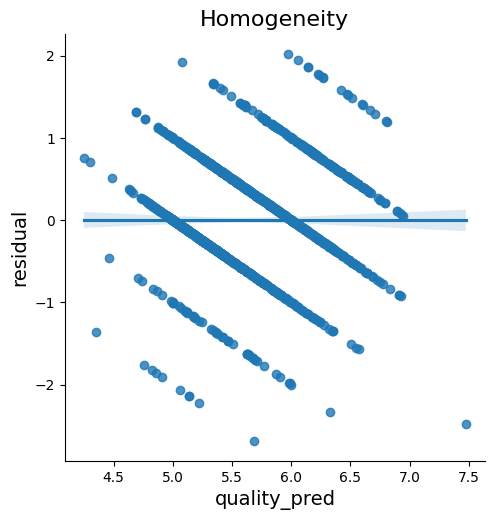

In [9]:
# Homogeneity - Plotting the residuals 殘差同質性
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df['residual'] = fitted_model.resid
df['quality_pred'] = fitted_model.predict(X)

# plt.subplots(figsize=(8, 4))
# plt.scatter(x=df.quality_pred, y=df.residual, alpha=0.8)
# plt.plot(np.repeat(0, len(df.quality_pred)+2), color='darkorange', linestyle='--')
# plt.xlim(4,8)
sns.lmplot(x ='quality_pred', y ='residual', data = df)

plt.ylabel('residual', fontsize=14)
plt.xlabel('quality_pred', fontsize=14)
plt.title('Homogeneity', fontsize=16)
plt.show()  

In [ ]:
#Homogeneity2 - White's test 殘差同質性
from statsmodels.stats.diagnostic import het_white
white_test = het_white(fitted_model.resid,  fitted_model.model.exog)
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
dict(zip(labels, white_test))

{'Test Statistic': 290.0129890638361,
 'Test Statistic p-value': 1.8962198578641565e-26,
 'F-Statistic': 4.376436195900481,
 'F-Test p-value': 5.329214077768896e-30}

In [ ]:
#Homogeneity3 - BP test 殘差同質性
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
bp_test = sms.het_breuschpagan(fitted_model.resid, fitted_model.model.exog)
dict(zip(names, bp_test))

[('Lagrange multiplier statistic', 84.98901511127907),
 ('p-value', 1.587975413640754e-13),
 ('f-value', 8.09875035300916),
 ('f p-value', 6.673273884819267e-14)]